<a href="https://colab.research.google.com/github/lrupp25/DraftProjectionProject/blob/main/data3000project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.sports-reference.com/cfb/years/2023-receiving.html

https://www.pro-football-reference.com/draft/2023-combine.htm

https://ras.football/

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#import data
ras=pd.read_csv('/content/drive/MyDrive/3000projectdata/data3000data/RAS.csv')
combine_2024 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2024.xlsx')
combine_2023 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2023.xlsx')
combine_2022 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2022.xlsx')
combine_2021 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2021.xlsx')
combine_2020 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2020.xlsx')
combine_2019 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2019.xlsx')
combine_2018 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2018.xlsx')
combine_2017 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2017.xlsx')
combine_2016 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2016.xlsx')
combine_2015 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2015.xlsx')
season_2023 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2023season.xlsx')
season_2022 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2022season.xlsx')
season_2021 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2021season.xlsx')
season_2020 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2020season.xlsx')
season_2019 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2019season.xlsx')
season_2018 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2018season.xlsx')
season_2017 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2017season.xlsx')
season_2016 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2016season.xlsx')
season_2015 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2015season.xlsx')
season_2014 =pd.read_excel('/content/drive/MyDrive/3000projectdata/data3000data/2014season.xlsx')


In [ ]:
#fixing row issues in column titles
season_2023.columns = season_2023.iloc[0]
season_2023 = season_2023[1:]

season_2022.columns = season_2022.iloc[0]
season_2022 = season_2022[1:]

season_2021.columns = season_2021.iloc[0]
season_2021 = season_2021[1:]

season_2020.columns = season_2020.iloc[0]
season_2020 = season_2020[1:]

season_2019.columns = season_2019.iloc[0]
season_2019 = season_2019[1:]

season_2018.columns = season_2018.iloc[0]
season_2018 = season_2018[1:]

season_2017.columns = season_2017.iloc[0]
season_2017 = season_2017[1:]

season_2016.columns = season_2016.iloc[0]
season_2016 = season_2016[1:]

season_2015.columns = season_2015.iloc[0]
season_2015 = season_2015[1:]

season_2014.columns = season_2014.iloc[0]
season_2014 = season_2014[1:]

In [ ]:
#adding draft year
combine_2024['DraftYear'] = 2024
combine_2023['DraftYear'] = 2023
combine_2022['DraftYear'] = 2022
combine_2021['DraftYear'] = 2021
combine_2020['DraftYear'] = 2020
combine_2019['DraftYear'] = 2019
combine_2018['DraftYear'] = 2018
combine_2017['DraftYear'] = 2017
combine_2016['DraftYear'] = 2016
combine_2015['DraftYear'] = 2015
season_2023['DraftYear'] = 2024
season_2022['DraftYear'] = 2023
season_2021['DraftYear'] = 2022
season_2020['DraftYear'] = 2021
season_2019['DraftYear'] = 2020
season_2018['DraftYear'] = 2019
season_2017['DraftYear'] = 2018
season_2016['DraftYear'] = 2017
season_2015['DraftYear'] = 2016
season_2014['DraftYear'] = 2015


In [ ]:
season = pd.concat([season_2023, season_2022, season_2021, season_2020, season_2019, season_2018, season_2017, season_2016, season_2015, season_2014], ignore_index=True)

In [ ]:
combine = pd.concat([combine_2024, combine_2023, combine_2022, combine_2021, combine_2020, combine_2019, combine_2018, combine_2017, combine_2016, combine_2015], ignore_index=True)

In [ ]:
#testing to see differences between season and combine dataframes
thing = combine.loc[combine['Player'] == "Ja'Lynn Polk"]


In [ ]:
poltest = pol.loc[pol['Player'].str.contains('njigba')]
poltest

,Rk,Player,School,Conf,G,Rec,Avg,TD,Att,Avg,TD,Plays,Yds,Avg,TD,DraftYear
993,49,jaxon smith-njigba,Ohio State,Big Ten,13,95,16.9,9,0,NaN,0,95,1606,16.9,9,2022


In [ ]:
pol=season

pol['Player'] = pol['Player'].str.replace(' Jr.', "")
pol['Player'] = pol['Player'].str.replace('*',"")
combine['Player'] = combine['Player'].str.replace(' Jr.', "")

In [ ]:
combine['Player'] = combine['Player'].str.lower()
pol['Player'] = pol['Player'].str.lower()

In [ ]:
combine = combine.loc[(combine['Pos'] == 'WR')]

In [ ]:
rad = combine
lee = pd.merge(rad, pol, how="left", on=['Player','DraftYear'])

In [ ]:
temp90 = lee.loc[:,[ 'Player', 'School_x', 'Ht', 'Wt', '40yd', 'Vertical', 'Broad Jump', '3Cone', 'Shuttle', 'Drafted (tm/rnd/yr)',
              'DraftYear', 'Conf', 'G', 'Yds', 'Adjuster', 'Award']]
ras = ras.drop(columns=['Link', 'Pos', 'AllTime', 'College'])
ras['Player'] = ras['Name'].str.lower()
ras['DraftYear'] = ras['Year']
ras = ras.drop(columns=['Year','Name'])
df = pd.merge(temp90, ras, how="left", on=['Player','DraftYear'])

#df = df.loc[(df['DraftYear'] != 2024)]

In [ ]:
df[['Team','Round','Pick','Year']] = df['Drafted (tm/rnd/yr)'].str.split(' / ',expand=True)
df=df.drop(columns=['Drafted (tm/rnd/yr)', 'Team', 'Pick', 'Year'])

In [ ]:
p5 = ["Pac-12", "Big Ten", "Big 12", "SEC", "ACC"]
schools = ['LSU', 'Oregon', 'Mississipi', 'Arizona St.', 'Wisconsin', 'Notre Dame', 'Oklahoma', 'Louisville','Texas', 'Michigan', 'Ohio State',
           'Stanford', 'Florida','Alabama','Pittsburgh','Utah','Oklahoma State','Missouri','West Virginia','North Carolina','Texas A&M','Cincinaati','Tennessee','Auburn']
df['isPower5'] = df['Conf'].isin(p5) | df['School_x'].isin(schools)

In [ ]:
df['Yds'].mean()
df['Yds'].std()

341.11512060218706

In [ ]:
df['yards_z'] = ((df['Yds'] - df['Yds'].mean())/df['Yds'].std())*4
df['Wt_z'] = ((df['Wt'] - df['Wt'].mean())/df['Wt'].std())*4
df['broad_z'] = ((df['Broad Jump'] - df['Broad Jump'].mean())/df['Broad Jump'].std())*4
df['vert_z'] = ((df['Vertical'] - df['Vertical'].mean())/df['Vertical'].std())*4

In [ ]:
tes = df
tes['Ht'] = tes['Ht'].astype(object)
tes1 = tes.loc[tes['Ht'] == "6-0"]
tes2 = tes.loc[tes['Ht'] != "6-0"]
tes2['Ht'] = tes2['Ht'].astype(str)
tes2[['temp1','temp2']] = tes2['Ht'].str.split(' ',expand=True)
tes2=tes2.drop(columns=['temp2'])

<ipython-input-112-c3328f046a84>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes2['Ht'] = tes2['Ht'].astype(str)
<ipython-input-112-c3328f046a84>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tes2[['temp1','temp2']] = tes2['Ht'].str.split(' ',expand=True)
<ipython-input-112-c3328f046a84>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [ ]:
tes2[['temp','temp2', 'temp3']] = tes2['temp1'].str.split('-',expand=True)
tes2=tes2.drop(columns=['temp', 'Ht', 'temp1'])
tes2['Ht'] = tes2['temp2'] + '-' + tes2['temp3']
tes2=tes2.drop(columns=['temp2','temp3'])


In [ ]:
attempt1 = pd.concat([tes1, tes2], ignore_index=True)

In [ ]:
attempt1 = attempt1.dropna(subset=['Ht'])

In [ ]:
attempt1[['temp','temp1']] = attempt1['Ht'].str.split('-',expand=True)
attempt1['temp'] = attempt1['temp'].astype(int)
attempt1['temp1'] = attempt1['temp1'].astype(int)
attempt1['Height'] = (attempt1['temp'] * 12) + attempt1['temp1']
attempt1=attempt1.drop(columns=['temp', 'temp1'])


In [ ]:
#attempt1=attempt1.drop(columns=['Ht'])
attempt1['ht_z'] = ((attempt1['Height'] - attempt1['Height'].mean())/(attempt1['Height'].std()))*4
attempt1=attempt1.drop(columns=['Height'])

In [ ]:
df = attempt1
df_temp = df
df['Round'] = df_temp['Round'].fillna("8th")


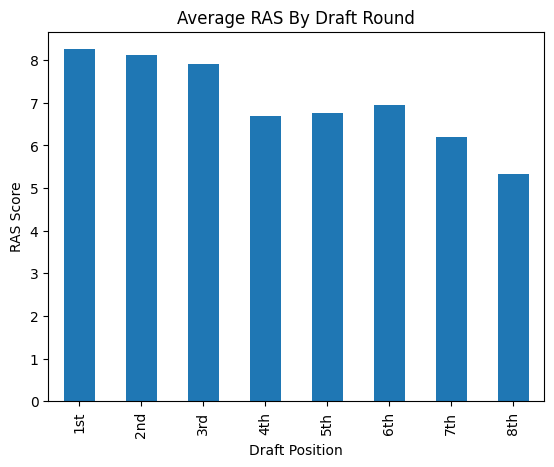

In [ ]:
import matplotlib.pyplot as plt
avg = df.groupby('Round')['RAS'].mean()
avg.plot(kind='bar', x='Round', y='Values', legend=None)
plt.xlabel('Draft Position')
plt.ylabel('RAS Score')
plt.title('Average RAS By Draft Round')
plt.show()

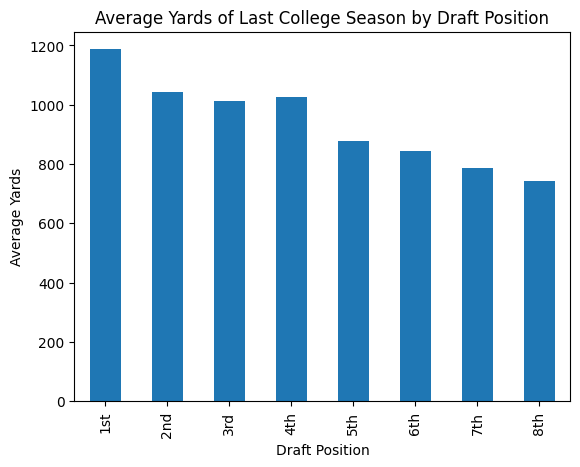

In [ ]:
ydavg = df.groupby('Round')['Yds'].mean()
ydavg
ydavg.plot(kind='bar', x='Round', y='Values', legend=None)
plt.xlabel('Draft Position')
plt.ylabel('Average Yards')
plt.title('Average Yards of Last College Season by Draft Position')
plt.show()

In [ ]:
nayear = df.groupby('DraftYear')['40yd'].apply(lambda x: x.isna().sum()).reset_index(name='Missing Combine Data')
nayear

,DraftYear,Missing Combine Data
0,2015,1
1,2016,0
2,2017,5
3,2018,7
4,2019,8
5,2020,10
6,2021,1
7,2022,7
8,2023,6
9,2024,9


In [ ]:
df2024 = df.loc[df['DraftYear'] == 2024]
temp_counts = df2024['Round'].value_counts().reset_index()
temp_counts.columns = ['Draft Position', '2024 Count']
level_counts = df['Round'].value_counts().reset_index()
level_counts.columns = ['Draft Position', 'Overall Count']
counts = pd.merge(level_counts, temp_counts, how="left", on=['Draft Position'])
counts

,Draft Position,Overall Count,2024 Count
0,8th,193,7
1,2nd,48,4
2,1st,43,7
3,3rd,41,5
4,6th,40,5
5,5th,38,4
6,4th,38,3
7,7th,31,4


In [ ]:
df.loc[df['40yd'].isna()]

,Player,School_x,Ht,Wt,40yd,Vertical,Broad Jump,3Cone,Shuttle,DraftYear,...,Adjuster,Award,RAS,Round,isPower5,yards_z,Wt_z,broad_z,vert_z,ht_z
2,malik nabers,LSU,6-0,200.0,NaN,NaN,NaN,NaN,NaN,2024,...,3.0,0.0,NaN,1st,True,7.919326,-0.346582,NaN,NaN,-1.387807
4,xavier weaver,Colorado,6-0,169.0,NaN,NaN,NaN,NaN,NaN,2024,...,0.0,0.0,NaN,8th,True,0.332445,-8.646402,NaN,NaN,-1.387807
36,darrell stewart,Michigan State,6-0,212.0,NaN,35.0,117.0,NaN,NaN,2020,...,0.0,0.0,NaN,8th,True,-2.470128,2.866251,-3.987818,-0.618802,-1.387807
45,dante pettis,Washington,6-0,186.0,NaN,NaN,NaN,NaN,NaN,2018,...,5.0,0.0,NaN,2nd,True,-0.980895,-4.094888,NaN,NaN,-1.387807
46,deontay burnett,USC,6-0,186.0,NaN,NaN,NaN,NaN,NaN,2018,...,0.0,0.0,NaN,8th,True,2.548705,-4.094888,NaN,NaN,-1.387807
48,cam phillips,Virginia Tech,6-0,201.0,NaN,NaN,NaN,NaN,NaN,2018,...,-2.0,0.0,1.68,8th,True,0.930483,-0.078846,NaN,NaN,-1.387807
55,dede westbrook,Oklahoma,6-0,178.0,NaN,NaN,NaN,NaN,NaN,2017,...,0.0,5.0,4.84,4th,True,8.56427,-6.236777,NaN,NaN,-1.387807
77,malachi corley,Western Kentucky,05-11,215.0,NaN,NaN,NaN,NaN,NaN,2024,...,0.0,0.0,NaN,3rd,False,1.176735,3.669460,NaN,NaN,-3.153428
83,marvin harrison,Ohio St.,06-03,209.0,NaN,NaN,NaN,NaN,NaN,2024,...,5.0,5.0,NaN,1st,True,4.014486,2.063043,NaN,NaN,3.909053
95,tayvion robinson,Kentucky,05-11,191.0,NaN,NaN,NaN,NaN,NaN,2024,...,0.0,0.0,NaN,8th,True,-3.877278,-2.756207,NaN,NaN,-3.153428


In [ ]:
dftest = df
dftest['40yd'].fillna(df['40yd'].mean(), inplace=True)
dftest['Vertical'].fillna(df['Vertical'].mean(), inplace=True)
dftest['Broad Jump'].fillna(df['Broad Jump'].mean(), inplace=True)
dftest['3Cone'].fillna(df['3Cone'].mean(), inplace=True)
dftest['Shuttle'].fillna(df['Shuttle'].mean(), inplace=True)
dftest['G'].fillna(df['G'].mean(), inplace=True)
dftest['Yds'].fillna(df['Yds'].mean(), inplace=True)
dftest['Wt_z'].fillna(df['Wt_z'].mean(), inplace=True)
dftest['broad_z'].fillna(df['broad_z'].mean(), inplace=True)
dftest['vert_z'].fillna(df['vert_z'].mean(), inplace=True)
dftest['yards_z'].fillna(df['yards_z'].mean(), inplace=True)
dftest['RAS'].fillna(df['RAS'].mean(), inplace=True)
df = dftest
df

,Player,School_x,Ht,Wt,40yd,Vertical,Broad Jump,3Cone,Shuttle,DraftYear,...,Adjuster,Award,RAS,Round,isPower5,yards_z,Wt_z,broad_z,vert_z,ht_z
0,jermaine burton,Alabama,6-0,196.0,4.450000,38.500000,133.000000,7.003948,4.27583,2024,...,0.0,0.0,9.070000,3rd,True,-1.133336,-1.417527,6.887750,3.744125,-1.387807
1,ladd mcconkey,Georgia,6-0,186.0,4.390000,36.000000,124.000000,7.003948,4.27583,2024,...,0.0,0.0,9.310000,2nd,True,-4.440138,-4.094888,0.770243,0.627749,-1.387807
2,malik nabers,LSU,6-0,200.0,4.507105,35.501205,122.892944,7.003948,4.27583,2024,...,3.0,0.0,6.532665,1st,True,7.919326,-0.346582,0.017752,0.005975,-1.387807
3,jamari thrash,Louisville,6-0,188.0,4.460000,34.000000,120.000000,7.160000,4.27583,2024,...,0.0,0.0,6.680000,5th,True,-0.289046,-3.559416,-1.948649,-1.865353,-1.387807
4,xavier weaver,Colorado,6-0,169.0,4.507105,35.501205,122.892944,7.003948,4.27583,2024,...,0.0,0.0,6.532665,8th,True,0.332445,-8.646402,0.017752,0.005975,-1.387807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,jaelen strong,Arizona State,06-02,217.0,4.440000,42.000000,123.000000,7.003948,4.27583,2015,...,0.0,0.0,9.140000,3rd,True,3.170196,4.204932,0.090520,8.107052,2.143433
473,darren waller,Georgia Tech,06-06,238.0,4.460000,37.000000,125.000000,7.070000,4.25000,2015,...,0.0,0.0,6.532665,6th,False,-0.020873,9.827391,1.449966,1.874299,9.205914
474,deandrew white,Alabama,05-11,193.0,4.440000,34.500000,118.000000,6.970000,4.18000,2015,...,0.0,0.0,6.970000,8th,True,-4.627757,-2.220735,-3.308095,-1.242077,-3.153428
475,kevin white,West Virginia,06-03,215.0,4.350000,36.500000,123.000000,6.920000,4.14000,2015,...,0.0,0.0,9.720000,1st,True,6.476998,3.669460,0.090520,1.251024,3.909053


In [ ]:
thing1= df.loc[df['40yd'].isna()]

In [ ]:
years = [2023, 2024]

In [ ]:
train_df = df.loc[df['DraftYear'] != 2024]
test_df = df.loc[df['DraftYear'] == 2024]
#predict_df = df.loc[df['DraftYear'] == 2024]

In [ ]:
X_train= train_df.loc[:,['ht_z', 'Wt', '40yd', 'Vertical', 'Broad Jump', '3Cone', 'Shuttle', 'isPower5',
             'G', 'Yds', 'Adjuster','Award']]
y_train = train_df.loc[:,['Round']]
X_test = test_df.loc[:,['ht_z', 'Wt', '40yd', 'Vertical', 'Broad Jump', '3Cone', 'Shuttle', 'isPower5',
             'G', 'Yds','Adjuster','Award']]
y_test = test_df.loc[:,['Round']]
#X_predict = predict_df.loc[:,['ht_z', 'Wt', '40yd', 'Vertical', 'Broad Jump', '3Cone', 'Shuttle', 'isPower5',
            #'G', 'Yds','Adjuster','Award']]
#y_predict = predict_df.loc[:,['Round']]

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=1500, max_features = 2, random_state=50)

In [ ]:
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

<ipython-input-131-cf5402122e92>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Accuracy: 0.38461538461538464


In [ ]:
feature_importances = rf_classifier.feature_importances_
feature_importances
test = { 'Feature': ['ht_z', 'Wt', '40yd', 'Vertical', 'Broad Jump', '3Cone', 'Shuttle', 'isPower5',
             'G', 'Yds', 'Adjuster','Award'],
         'Importance': feature_importances
}
testthing = pd.DataFrame(test)
testthing

,Feature,Importance
0,ht_z,0.080041
1,Wt,0.114914
2,40yd,0.137135
3,Vertical,0.101295
4,Broad Jump,0.100771
5,3Cone,0.082957
6,Shuttle,0.091689
7,isPower5,0.026994
8,G,0.082695
9,Yds,0.150196


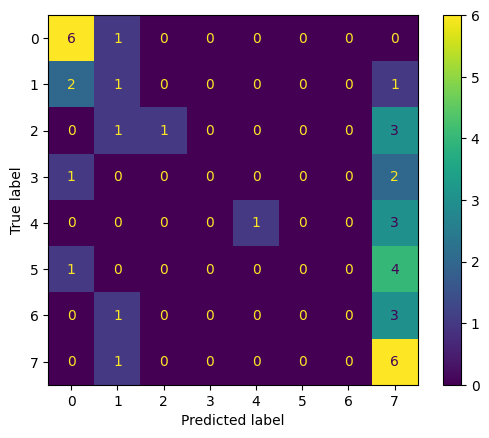

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
thing5 = test_df
thing5['predicted'] = y_pred
thing6 = thing5.loc[:, ['Player', 'Round', 'predicted']]
thing6

<ipython-input-38-a02b07ee8a08>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thing5['predicted'] = y_pred


,Player,Round,predicted
0,jermaine burton,3rd,8th
1,ladd mcconkey,2nd,1st
2,malik nabers,1st,1st
3,jamari thrash,5th,8th
4,xavier weaver,8th,8th
74,javon baker,4th,8th
75,jalen coker,8th,8th
76,keon coleman,2nd,8th
77,malachi corley,3rd,8th
78,jacob cowing,8th,2nd


In [ ]:
thing6[['NumRoundDr','temp1']] = thing6['Round'].str.split('t',expand=True)
thing6=thing6.drop(columns=['temp1'])
thing6[['NumRoundPred','temp2']] = thing6['predicted'].str.split('t',expand=True)
thing6=thing6.drop(columns=['temp2'])

In [ ]:
thing6['RoundDrNo'] = thing6['Round'].str.slice(stop=1).astype(int)
thing6['RoundPredicted'] = thing6['predicted'].str.slice(stop=1).astype(int)
thing6['diff'] = abs(thing6['RoundDrNo'] - thing6['RoundPredicted'])
thing6['diff'].mean()

1.8461538461538463

In [ ]:
new_df = savetemp
new_df

,Player,School_x,Ht,Wt,40yd,Vertical,Broad Jump,3Cone,Shuttle,DraftYear,...,Adjuster,Award,RAS,Round,isPower5,yards_z,Wt_z,broad_z,vert_z,ht_z
0,jermaine burton,Alabama,6-0,196.0,4.450000,38.500000,133.000000,7.003948,4.27583,2024,...,0.0,0.0,9.070000,3rd,True,-1.133336,-1.417527,6.887750,3.744125,-1.387807
1,ladd mcconkey,Georgia,6-0,186.0,4.390000,36.000000,124.000000,7.003948,4.27583,2024,...,0.0,0.0,9.310000,2nd,True,-4.440138,-4.094888,0.770243,0.627749,-1.387807
2,malik nabers,LSU,6-0,200.0,4.507105,35.501205,122.892944,7.003948,4.27583,2024,...,3.0,0.0,6.532665,1st,True,7.919326,-0.346582,0.017752,0.005975,-1.387807
3,jamari thrash,Louisville,6-0,188.0,4.460000,34.000000,120.000000,7.160000,4.27583,2024,...,0.0,0.0,6.680000,5th,True,-0.289046,-3.559416,-1.948649,-1.865353,-1.387807
4,xavier weaver,Colorado,6-0,169.0,4.507105,35.501205,122.892944,7.003948,4.27583,2024,...,0.0,0.0,6.532665,8th,True,0.332445,-8.646402,0.017752,0.005975,-1.387807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,jaelen strong,Arizona State,06-02,217.0,4.440000,42.000000,123.000000,7.003948,4.27583,2015,...,0.0,0.0,9.140000,3rd,True,3.170196,4.204932,0.090520,8.107052,2.143433
473,darren waller,Georgia Tech,06-06,238.0,4.460000,37.000000,125.000000,7.070000,4.25000,2015,...,0.0,0.0,6.532665,6th,False,-0.020873,9.827391,1.449966,1.874299,9.205914
474,deandrew white,Alabama,05-11,193.0,4.440000,34.500000,118.000000,6.970000,4.18000,2015,...,0.0,0.0,6.970000,8th,True,-4.627757,-2.220735,-3.308095,-1.242077,-3.153428
475,kevin white,West Virginia,06-03,215.0,4.350000,36.500000,123.000000,6.920000,4.14000,2015,...,0.0,0.0,9.720000,1st,True,6.476998,3.669460,0.090520,1.251024,3.909053


In [ ]:
savetemp = savetemp.dropna(subset='RAS')

Round
1st    7.972527
2nd    7.854194
3rd    7.783675
4th    6.669631
5th    6.743105
6th    6.915267
7th    6.226301
8th    5.518950
Name: RAS, dtype: float64

In [ ]:
savetemp

,Player,School_x,Ht,Wt,40yd,Vertical,Broad Jump,3Cone,Shuttle,DraftYear,...,Adjuster,Award,RAS,Round,isPower5,yards_z,Wt_z,broad_z,vert_z,ht_z
0,jermaine burton,Alabama,6-0,196.0,4.450000,38.500000,133.000000,7.003948,4.27583,2024,...,0.0,0.0,9.070000,3rd,True,-1.133336,-1.417527,6.887750,3.744125,-1.387807
1,ladd mcconkey,Georgia,6-0,186.0,4.390000,36.000000,124.000000,7.003948,4.27583,2024,...,0.0,0.0,9.310000,2nd,True,-4.440138,-4.094888,0.770243,0.627749,-1.387807
2,malik nabers,LSU,6-0,200.0,4.507105,35.501205,122.892944,7.003948,4.27583,2024,...,3.0,0.0,6.532665,1st,True,7.919326,-0.346582,0.017752,0.005975,-1.387807
3,jamari thrash,Louisville,6-0,188.0,4.460000,34.000000,120.000000,7.160000,4.27583,2024,...,0.0,0.0,6.680000,5th,True,-0.289046,-3.559416,-1.948649,-1.865353,-1.387807
4,xavier weaver,Colorado,6-0,169.0,4.507105,35.501205,122.892944,7.003948,4.27583,2024,...,0.0,0.0,6.532665,8th,True,0.332445,-8.646402,0.017752,0.005975,-1.387807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,jaelen strong,Arizona State,06-02,217.0,4.440000,42.000000,123.000000,7.003948,4.27583,2015,...,0.0,0.0,9.140000,3rd,True,3.170196,4.204932,0.090520,8.107052,2.143433
473,darren waller,Georgia Tech,06-06,238.0,4.460000,37.000000,125.000000,7.070000,4.25000,2015,...,0.0,0.0,6.532665,6th,False,-0.020873,9.827391,1.449966,1.874299,9.205914
474,deandrew white,Alabama,05-11,193.0,4.440000,34.500000,118.000000,6.970000,4.18000,2015,...,0.0,0.0,6.970000,8th,True,-4.627757,-2.220735,-3.308095,-1.242077,-3.153428
475,kevin white,West Virginia,06-03,215.0,4.350000,36.500000,123.000000,6.920000,4.14000,2015,...,0.0,0.0,9.720000,1st,True,6.476998,3.669460,0.090520,1.251024,3.909053


dead/saved code

In [ ]:
#combine_2022[['Team','Round','Pick','Year']] = combine_2022['Drafted (tm/rnd/yr)'].str.split(' / ',expand=True)
#combine_2022=combine_2022.drop(columns=['Drafted (tm/rnd/yr)', 'Team', 'Pick', 'Year'])

In [ ]:
#ras = ras.drop(['Link'], axis = 1)
#ras['DraftYear'] = ras['Year']
#ras.drop('Year', axis=1)

In [ ]:
#ras['School'] = ras['College']
#ras['Player'] = ras['Name']
#ras.drop(['College'], axis=1 )
#ras.drop(['Name'], axis=1)

In [ ]:
#null_rows = df.loc[df['Rk'].isnull()]
#null_rows